In [ ]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random

In [1]:
execfile('ML_Challenge_data_preprocessing.py')

('Generated X with shape ', (347698, 1000))
('Generated y with shape ', (347698,))


In [68]:
first_seq_label, second_seq_label = [y[9],y[5]]
print 'First 2 lables are: ' + str(first_seq_label) + ' and ' + str(second_seq_label)

First 2 lables are: 0 and 0


In [69]:
execfile('longest_common_subsequence.py')
seq1, seq2 = X[9], X[5]
print 'Start of seq1: ' + str(seq1[0:5])
print 'Start of seq2: ' + str(seq2[0:5])

mat = longest_common_subsequence_matrix(seq1, seq2)
print 'Length of longest common subsequence: ' + str(mat[999,999])

Start of seq1: ['G' 'C' 'T' 'G' 'G']
Start of seq2: ['T' 'T' 'G' 'G' 'C']
Length of longest common subsequence: 655.0


In [79]:
num_pairs = 100
both_label0_seq_lengths = []
both_label1_seq_lengths = []
diff_labels_seq_lengths = []

# split into promotors and enhancers
promoter_idcs = (y == 0).nonzero()[0]
num_promoters = len(promoter_idcs)
enhancer_idcs = (y == 1).nonzero()[0]
num_enhancers = len(enhancer_idcs)
assert(num_promoters + num_enhancers == X.shape[0])
promoter_X = X[promoter_idcs,]
enhancer_X = X[enhancer_idcs,]
print promoter_X.shape
print enhancer_X.shape

(274299, 1000)
(73399, 1000)


In [81]:
for i in range(num_pairs):
    random_idx1 = int(random.random()*num_promoters)
    random_idx2 = int(random.random()*num_promoters)
    assert(random_idx1 != random_idx2)
    seq1 = promoter_X[random_idx1]
    seq2 = promoter_X[random_idx2]
    mat = longest_common_subsequence_matrix(seq1, seq2)
    both_label0_seq_lengths.append(mat[len(seq1)-1,len(seq2)-1])

print both_label0_seq_lengths[0:10]

[644.0, 638.0, 615.0, 615.0, 639.0, 636.0, 642.0, 606.0, 626.0, 607.0]


In [82]:
for i in range(num_pairs):
    random_idx1 = int(random.random()*num_enhancers)
    random_idx2 = int(random.random()*num_enhancers)  
    assert(random_idx1 != random_idx2)    
    seq1 = enhancer_X[random_idx1]
    seq2 = enhancer_X[random_idx2]
    mat = longest_common_subsequence_matrix(seq1, seq2)
    both_label1_seq_lengths.append(mat[len(seq1)-1,len(seq2)-1])

print both_label1_seq_lengths[0:10]

[617.0, 628.0, 610.0, 616.0, 597.0, 605.0, 652.0, 618.0, 654.0, 622.0]


In [84]:
for i in range(num_pairs):
    random_idx1 = int(random.random()*num_enhancers)
    random_idx2 = int(random.random()*num_promoters)  
    seq1 = enhancer_X[random_idx1]
    seq2 = promoter_X[random_idx2]
    mat = longest_common_subsequence_matrix(seq1, seq2)
    diff_labels_seq_lengths.append(mat[len(seq1)-1,len(seq2)-1])

print diff_labels_seq_lengths[0:10]

[558.0, 578.0, 538.0, 609.0, 554.0, 574.0, 528.0, 659.0, 601.0, 620.0]


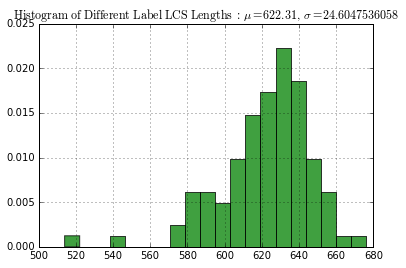

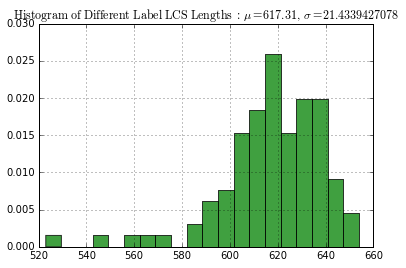

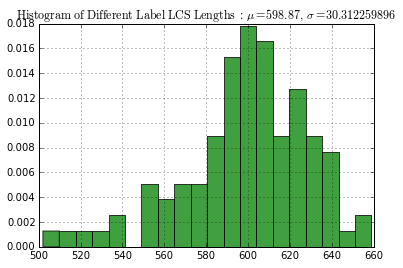

In [88]:
%matplotlib inline

def plot_lcs_lengths(seq_lengths):
    n, bins, patches = plt.hist(seq_lengths, 20, normed=1, facecolor='green', alpha=0.75)
    mu = np.mean(seq_lengths)
    sigma = np.std(seq_lengths)
    plt.title(r'$\mathrm{Histogram\ of\ Different\ Label\ LCS\ Lengths\ :}\ \mu='
              '' + str(mu) + ',\ \sigma=' + str(sigma) + '$')
    # Note: there is a value lower, ths has cut some extremes
    plt.grid(True)
    plt.show()

plot_lcs_lengths(both_label0_seq_lengths)
plot_lcs_lengths(both_label1_seq_lengths)
plot_lcs_lengths(diff_labels_seq_lengths)

Perhaps if we track down the most common subsequence, this could be used as a classifier.